# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"

## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

#1 Carga de datos

In [1]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110683 sha256=7e8d439f84dac7feeb44daeecf89ac98fc7e666109b97ee341cd602daf0fdad4
  Stored in directory: /Users/getec/Library/Caches/pip/wheels/6a/2b/d0/457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle


In [ ]:
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

{}

In [2]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
# Descargar el dataset
!kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

 99%|███████████████████████████████████████▊| 444M/447M [00:13<00:00, 29.9MB/s]
100%|████████████████████████████████████████| 447M/447M [00:13<00:00, 33.8MB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
#BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"
BASE_FOLDER = "dataset"

In [9]:
!mkdir $BASE_FOLDER

In [10]:
!cp yoga-posture-dataset.zip $BASE_FOLDER

In [11]:
# Descomprimimos
!cd $BASE_FOLDER
!unzip yoga-posture-dataset.zip -d $BASE_FOLDER

Archive:  yoga-posture-dataset.zip
  inflating: dataset/Adho Mukha Svanasana/File1.png  
  inflating: dataset/Adho Mukha Svanasana/File10.png  
  inflating: dataset/Adho Mukha Svanasana/File11.png  
  inflating: dataset/Adho Mukha Svanasana/File12.png  
  inflating: dataset/Adho Mukha Svanasana/File13.png  
  inflating: dataset/Adho Mukha Svanasana/File14.png  
  inflating: dataset/Adho Mukha Svanasana/File15.png  
  inflating: dataset/Adho Mukha Svanasana/File16.png  
  inflating: dataset/Adho Mukha Svanasana/File17.png  
  inflating: dataset/Adho Mukha Svanasana/File18.png  
  inflating: dataset/Adho Mukha Svanasana/File19.png  
  inflating: dataset/Adho Mukha Svanasana/File2.png  
  inflating: dataset/Adho Mukha Svanasana/File20.png  
  inflating: dataset/Adho Mukha Svanasana/File21.png  
  inflating: dataset/Adho Mukha Svanasana/File22.png  
  inflating: dataset/Adho Mukha Svanasana/File23.png  
  inflating: dataset/Adho Mukha Svanasana/File24.png  
  inflating: dataset/Adho Mukha 

# 2. Inspección del conjunto de datos

Vamos a inspeccionar el número de categorías y cuántas imágenes tenemos por categoría para ver lo equilibrado del dataset.

In [3]:
# Imports necesarios
from imutils import paths
from random import choice
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from tabulate import tabulate
import numpy as np
import collections
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.regularizers import l2, l1

In [4]:
base_folder = Path(BASE_FOLDER)
dataset = {pose.name: len(list(pose.glob('*'))) for pose in base_folder.iterdir() if pose.is_dir()}
print(f'Número de categorías: {len(dataset)}, total de ficheros:{sum(dataset.values())}')
table = tabulate(dataset.items(), headers=["Postura", "Número de imágenes"])
print(table)

Número de categorías: 47, total de ficheros:2758
Postura                          Número de imágenes
-----------------------------  --------------------
Navasana                                         18
Hanumanasana                                     41
Phalakasana                                      66
Ardha Navasana                                   13
Adho Mukha Svanasana                             74
Sivasana                                         20
Padmasana                                        77
Salamba Bhujangasana                             62
Supta Kapotasana                                 13
Upavistha Konasana                               17
Utthita Hasta Padangusthasana                    64
Ardha Pincha Mayurasana                          54
Camatkarasana                                    62
Malasana                                         73
Uttanasana                                       71
Parsva Virabhadrasana                            14
Ustrasana      

Seguidamente mostramos imágenes elegidas al azar.

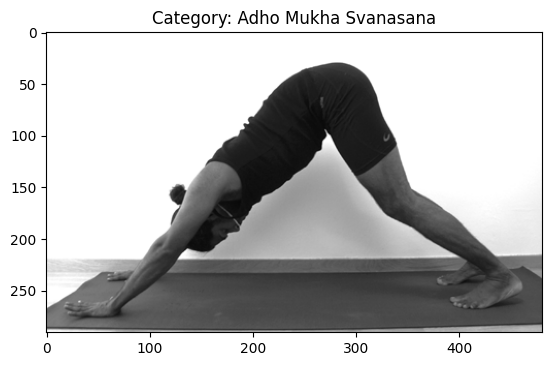

In [6]:
# Mostramos una imagen de ejemplo del dataset recién descargado
# Ahora buscamos una imagen al azar

all_images = list(paths.list_images(BASE_FOLDER))
random_image = choice(all_images)
img = cv2.imread(random_image, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
label = Path(random_image).parents[0].name
plt.title(f'Category: {label}')
plt.imshow(img)
plt.show()

# 3. Acondicionamiento de los datos

Debemos dividir de manera equilibrada el dataset entre training y test. No podemos utilizar una división sencilla porque ello podría conllevar que hubiera clases superrepresentadas en uno de los datasets e infrarrepresentada en el otro (por ejemplo, podría ocurrir que de las 41 imágenes de la categoría Hanumanasana solo 2 entrasen en el dataset de training). Por ello debemos realizar una división más enfocada a la estructura del dataset concreto. Haremos uso de un Dataframe para apoyarnos en eso.

Cargamos la lista de imágenes en un dataset y la vamos a categorizar por su directorio directamente superior

In [7]:


categories_dict = collections.defaultdict(list)
for path in all_images:
    categories_dict[Path(path).parents[0].name].append(path)
categories_dict = dict(categories_dict)


number_of_classes = len(categories_dict.keys())
batch_size = 32
img_height = 224
img_width = 224
train_size = 0.8
test_size = 1 - train_size

Cargamos el diccionario en un dataframe y dividimos dicho dataframe entre test y training de forma que el porcentaje de test y training se respete por categoría.

In [8]:
image_paths = []
categories = []
for category, paths in categories_dict.items():
  image_paths.extend(paths)
  categories.extend([category] * len(paths))

df = pd.DataFrame({'image_path':image_paths, 'category':categories})

def split_categories(cat):
  train, test = train_test_split(cat, test_size=test_size, random_state=42)
  return pd.concat([train, test])

def select_cat_percentage(cat, percent):
  num_rows = int(len(cat) * percent)
  return cat.head(num_rows)

val_df = df.groupby('category', group_keys=False, as_index=False).apply(select_cat_percentage, percent=test_size)
#print(val_df['category'].value_counts())
merged_df = df.merge(val_df, on=['image_path', 'category'], how='outer', indicator=True)
train_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])
#print(train_df['category'].value_counts())

Para aprovechar la potencia de la librería Albumentations, con objeto de tener una aumentación más flexible, vamos a crear un DataGenerator que haga uso de esa librería.

Primero nos aseguramos de que está instalada.

In [19]:
!pip install albumentations opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 65.7 MB/s eta 0:00:0000:0100:01


Después creamos la clase

In [9]:
import albumentations as A
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import Sequence, to_categorical
import cv2

class AugmentedDataGenerator(Sequence):
    def __init__(self, dataframe, image_path_col, label_col, batch_size, image_size, shuffle=True, *args, **kwargs):
        self.dataframe = dataframe
        self.image_paths = dataframe[image_path_col].tolist()
        self.labels = dataframe[label_col].values
        num_classes = len(dataframe[label_col].unique())
        self.label_encoder = LabelEncoder()
        self.label_encodings = self.label_encoder.fit_transform(self.labels)
        self.labels_ohe = to_categorical(self.label_encodings, num_classes)
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        augmentation_list = []
        for augmentation_name, params in kwargs.items():
            try:
                class_name = self._snake_to_camel(augmentation_name)
                print(f"Fetching class {class_name} from module with params {params}")
                augmentation_class = getattr(A, class_name)
                augmentation = augmentation_class(**params)
                augmentation_list.append(augmentation)
            except AttributeError:
                print(f"Warning: Augmentation '{augmentation_name}' not found.")
        self.augmentations = A.Compose(augmentation_list)
        self.indexes = np.arange(len(self.image_paths))

        if self.shuffle:
          np.random.shuffle(self.indexes)

    def step_size(self):
      return len(self.indexes) / self.batch_size

    def _snake_to_camel(self, snake_str):
        words = snake_str.strip().split('_')
        return ''.join(x.title() for x in words)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def get_label(self, label_ohe):
      return self.label_encoder.inverse_transform([label_ohe])[0]

    def _load_preprocess_img(self, img_path):
        image = cv2.imread(img_path)
        image = cv2.resize(image, (self.image_size[1], self.image_size[0]))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype('float32')
        image /= 255.0

        return image

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        batch_image_paths = [self.image_paths[i] for i in batch_indexes]
        batch_labels = [self.labels_ohe[i] for i in batch_indexes]

        batch_images = []
        for image_path in batch_image_paths:
            image = self._load_preprocess_img(image_path)
            augmented = self.augmentations(image=image)
            augmented_image = augmented['image']
            batch_images.append(augmented_image)

        return np.array(batch_images), np.array(batch_labels)

    def on_epoch_end(self):
      if self.shuffle:
        np.random.shuffle(self.indexes)

In [10]:
train_generator = AugmentedDataGenerator(train_df, image_path_col='image_path', label_col='category',
                                        batch_size=32, image_size=(224, 224, 3),
                                         horizontal_flip={'p':0.5},
                                         rotate={'limit':30, 'p':.4}
                                         )
val_generator = AugmentedDataGenerator(val_df, image_path_col='image_path', label_col='category',
                                        batch_size=32, image_size=(224, 224, 3))




Fetching class HorizontalFlip from module with params {'p': 0.5}
Fetching class Rotate from module with params {'limit': 30, 'p': 0.4}


Vamos a mostrar una imagen de cada uno de los datasets

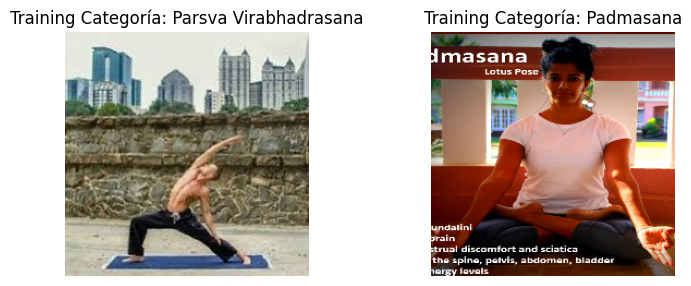

In [11]:
import random
batch_images, batch_labels = train_generator.__getitem__(0)  # Assuming index 0 for the first batch

# Choose a random sample from the batch
random_index = random.randint(0, len(batch_images) - 1)
random_training_image = batch_images[random_index]
random_training_label = batch_labels[random_index]

batch_images, batch_labels = val_generator.__getitem__(0)  # Assuming index 0 for the first batch

# Choose a random sample from the batch
random_index = random.randint(0, len(batch_images) - 1)
random_test_image = batch_images[random_index]
random_test_label = batch_labels[random_index]

position = 1

plt.subplot(1, 2, position)
plt.imshow(random_training_image)
plt.title(f"Training Categoría: {train_generator.get_label(np.argmax(random_training_label))}")
plt.axis('off')
position += 1

plt.subplot(1, 2, position)
plt.imshow(random_test_image)
plt.title(f"Training Categoría: {val_generator.get_label(np.argmax(random_test_label))}")
plt.axis('off')
position += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()



# 4.Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers.legacy import Adam

Comenzamos con un diseño de la red básico para ver cuál es su comportamiento y qué mejoras puede recibir esa arquitectura

In [ ]:
model = Sequential()

# BASE MODEL
model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))

#TOP MODEL
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(number_of_classes,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [13]:
def plot_learning_curve(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Learning Curve')
  plt.xlabel('epoch')
  plt.legend(['Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss'], loc='upper left')
  plt.show()

Lo entrenamos durante un número bajo de épocas para ver su tendencia

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/10
70/70 [==============================] - 714s 10s/step - loss: 3.8818 - accuracy: 0.0475 - val_loss: 3.6197 - val_accuracy: 0.1393
Epoch 2/10
70/70 [==============================] - 23s 328ms/step - loss: 3.3430 - accuracy: 0.1761 - val_loss: 3.0647 - val_accuracy: 0.2385
Epoch 3/10
70/70 [==============================] - 24s 344ms/step - loss: 2.7999 - accuracy: 0.3060 - val_loss: 2.6077 - val_accuracy: 0.3492
Epoch 4/10
70/70 [==============================] - 25s 353ms/step - loss: 2.2314 - accuracy: 0.4673 - val_loss: 2.3469 - val_accuracy: 0.4370
Epoch 5/10
70/70 [==============================] - 23s 332ms/step - loss: 1.7944 - accuracy: 0.5565 - val_loss: 2.2721 - val_accuracy: 0.4504
Epoch 6/10
70/70 [==============================] - 24s 338ms/step - loss: 1.5394 - accuracy: 0.6196 - val_loss: 2.2645 - val_accuracy: 0.4676
Epoch 7/10
70/70 [==============================] - 24s 339ms/step - loss: 1.3826 - accuracy: 0.6617 - val_loss: 2.2689 - val_accuracy: 0.4943


Observamos su curva de aprendizaje

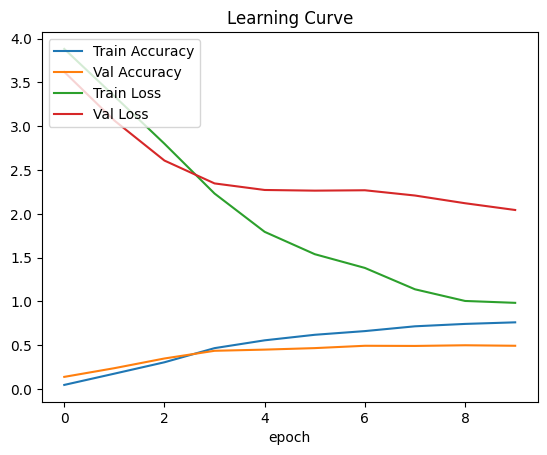

In [ ]:

plot_learning_curve(history)


Observamos en la gráfica una clara muestra de overfitting: la pérdida de validación se mantiene muy alejada de la de entrenamiento. Cabe entonces buscar mejoras en el entrenamiento. Una de las posibles causas sea la falta de complejidad en la arquitectura de la red. El siguiente paso, por lo tanto, es probar otro diseño. Una de las estrategias de diseño es la construcción de bloques convolucionales compuestos por capas de convolución activadas por funciones ReLU, situando al final de cada bloque una capa de Pooling que reduzca la dimensionalidad espacial (mientras el número de filtros va creciendo) para el siguiente bloque. Tras esta concatenación de bloques convolucionales, se da por finalizado el Bottom Model y se pasa el testigo al Top Model, la parte fully connected que realiza la clasificación en base a las características extraídas por la parte convolucional.

In [25]:
# Define the number of classes

# Create a Sequential model
model = Sequential()

# Convolutional layers and MaxPooling layers
# BLOQUE CONVOLUCIONAL 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# BLOQUE CONVOLUCIONAL 2
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))


# Flatten the output and add fully connected (dense) layers
model.add(Flatten()) # --> dice la profesora que una capa GlobalAveragePooling o GlobalMaxPooling ayudan a contrarrestar el overfiting mejor que una flatten.
model.add(Dense(256, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))  # Output layer with softmax activation for multiple classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 256)       0         
 g2D)                                                   

In [26]:
# Entrenamos el modelo
checkpoint = ModelCheckpoint('best.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(train_generator,
                    steps_per_epoch=train_generator.step_size(),
                    epochs=10,
                    callbacks=[checkpoint, early_stopping],
                    validation_data=val_generator,
                    validation_steps=val_generator.step_size())

Epoch 1/10
27/69 [==========>...................] - ETA: 2:00 - loss: 4.8964 - accuracy: 0.0243

libpng warning: iCCP: known incorrect sRGB profile


42/69 [=================>............] - ETA: 1:15 - loss: 4.5041 - accuracy: 0.0262

libpng warning: iCCP: known incorrect sRGB profile


50/69 [====================>.........] - ETA: 53s - loss: 4.3900 - accuracy: 0.0276

KeyboardInterrupt: 

Podemos ver que aunque el accuracy en validación ha subido algo, el overfitting sigue siendo pronunciado. Por lo tanto, el simple incremento de complejidad no ha resuelto el problema.

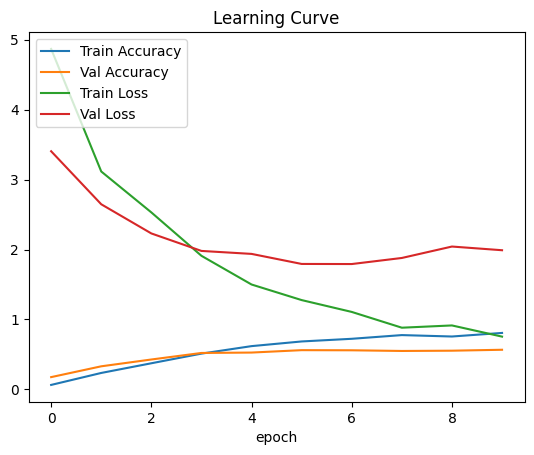

In [ ]:
plot_learning_curve(history)

El siguiente acercamiento por lo tanto consiste en probar otras estrategias de reducción del overfitting. Procedemos a introducir medidas de regularización de pesos a la primera arquitectura:

In [ ]:

model = Sequential()

# BASE MODEL
model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu', kernel_regularizer=l1(0.01)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l1(0.01)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu', kernel_regularizer=l1(0.01)))

#TOP MODEL
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(number_of_classes,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 173056)           

Entrenamos el modelo

In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/30
70/70 [==============================] - 25s 335ms/step - loss: 15.0877 - accuracy: 0.0278 - val_loss: 8.2808 - val_accuracy: 0.0363
Epoch 2/30
70/70 [==============================] - 23s 333ms/step - loss: 7.0271 - accuracy: 0.0246 - val_loss: 6.1080 - val_accuracy: 0.0286
Epoch 3/30
70/70 [==============================] - 24s 337ms/step - loss: 5.5452 - accuracy: 0.0341 - val_loss: 4.9883 - val_accuracy: 0.0706
Epoch 4/30
70/70 [==============================] - 23s 329ms/step - loss: 4.6387 - accuracy: 0.0766 - val_loss: 4.2174 - val_accuracy: 0.1011
Epoch 5/30
70/70 [==============================] - 24s 340ms/step - loss: 4.0192 - accuracy: 0.1268 - val_loss: 3.7330 - val_accuracy: 0.1756
Epoch 6/30
70/70 [==============================] - 25s 355ms/step - loss: 3.6240 - accuracy: 0.1734 - val_loss: 3.4222 - val_accuracy: 0.2309
Epoch 7/30
70/70 [==============================] - 24s 341ms/step - loss: 3.3730 - accuracy: 0.2267 - val_loss: 3.3006 - val_accuracy: 0.257

El comportamiento parece haber mejorado aunque el entrenamiento se ha quedado atascado en un _plateau_.

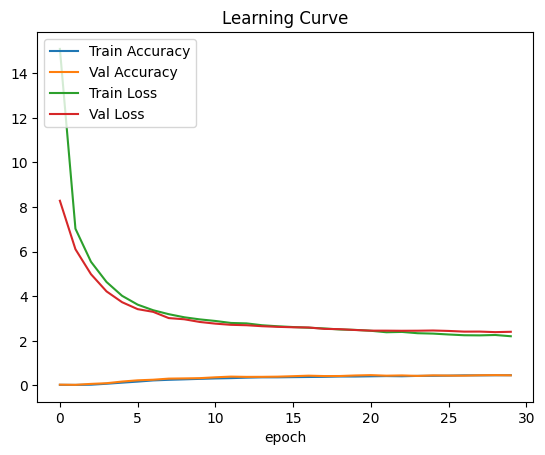

In [ ]:
plot_learning_curve(history)

Podemos tomar medidas adicionales para mejorar el modelo: incrementar algo más la complejidad e introducir capas de Dropout y BatchNormalization.

In [17]:
model = Sequential()

# BASE MODEL
model.add(Conv2D(32,(3,3),input_shape=(img_width,img_height,3),activation='relu'))
#model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.6))
#model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),activation='relu'))
#model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.6))
#model.add(BatchNormalization())

model.add(Conv2D(512,(3,3),activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())

#TOP MODEL
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(number_of_classes,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 54, 54, 128)      

Entrenamos de nuevo

In [18]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/30
31/70 [============>.................] - ETA: 8s - loss: 15.8466 - accuracy: 0.0272

libpng warning: iCCP: known incorrect sRGB profile


39/70 [===============>..............] - ETA: 6s - loss: 13.3847 - accuracy: 0.0280

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 9.1782 - accuracy: 0.0237

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 21s 270ms/step - loss: 9.1782 - accuracy: 0.0237 - val_loss: 3.8390 - val_accuracy: 0.0305
Epoch 2/30
 1/70 [..............................] - ETA: 25s - loss: 3.8419 - accuracy: 0.0938

libpng warning: iCCP: known incorrect sRGB profile


19/70 [=======>......................] - ETA: 10s - loss: 3.8381 - accuracy: 0.0428

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.8351 - accuracy: 0.0332

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 237ms/step - loss: 3.8351 - accuracy: 0.0332 - val_loss: 3.8278 - val_accuracy: 0.0344
Epoch 3/30
12/70 [====>.........................] - ETA: 11s - loss: 3.8294 - accuracy: 0.0365

libpng warning: iCCP: known incorrect sRGB profile


59/70 [========================>.....] - ETA: 2s - loss: 3.8182 - accuracy: 0.0319

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.8138 - accuracy: 0.0341

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 16s 231ms/step - loss: 3.8138 - accuracy: 0.0341 - val_loss: 3.7325 - val_accuracy: 0.0477
Epoch 4/30
 1/70 [..............................] - ETA: 24s - loss: 3.8123 - accuracy: 0.0938

libpng warning: iCCP: known incorrect sRGB profile


61/70 [=========================>....] - ETA: 1s - loss: 3.6492 - accuracy: 0.0849

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.6275 - accuracy: 0.0923

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 235ms/step - loss: 3.6275 - accuracy: 0.0923 - val_loss: 3.8556 - val_accuracy: 0.0897
Epoch 5/30
36/70 [==============>...............] - ETA: 6s - loss: 3.3880 - accuracy: 0.1530

libpng warning: iCCP: known incorrect sRGB profile


53/70 [=====================>........] - ETA: 3s - loss: 3.3556 - accuracy: 0.1629

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.3224 - accuracy: 0.1676

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 16s 232ms/step - loss: 3.3224 - accuracy: 0.1676 - val_loss: 3.2315 - val_accuracy: 0.1737
Epoch 6/30
13/70 [====>.........................] - ETA: 11s - loss: 3.2818 - accuracy: 0.1995

libpng warning: iCCP: known incorrect sRGB profile


17/70 [======>.......................] - ETA: 10s - loss: 3.2718 - accuracy: 0.2071

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.1923 - accuracy: 0.2182

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 16s 226ms/step - loss: 3.1923 - accuracy: 0.2182 - val_loss: 3.1698 - val_accuracy: 0.2195
Epoch 7/30
 6/70 [=>............................] - ETA: 12s - loss: 3.0073 - accuracy: 0.2552

libpng warning: iCCP: known incorrect sRGB profile


34/70 [=============>................] - ETA: 7s - loss: 3.0601 - accuracy: 0.2381

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.0448 - accuracy: 0.2616

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 238ms/step - loss: 3.0448 - accuracy: 0.2616 - val_loss: 3.1874 - val_accuracy: 0.2290
Epoch 8/30
15/70 [=====>........................] - ETA: 11s - loss: 2.8807 - accuracy: 0.2833

libpng warning: iCCP: known incorrect sRGB profile


32/70 [============>.................] - ETA: 8s - loss: 2.8350 - accuracy: 0.2998

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 2.9069 - accuracy: 0.2979

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 243ms/step - loss: 2.9069 - accuracy: 0.2979 - val_loss: 3.4150 - val_accuracy: 0.2004
Epoch 9/30
 1/70 [..............................] - ETA: 28s - loss: 2.8279 - accuracy: 0.3125

libpng warning: iCCP: known incorrect sRGB profile


 8/70 [==>...........................] - ETA: 13s - loss: 3.0522 - accuracy: 0.2852

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 2.9962 - accuracy: 0.3038

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 241ms/step - loss: 2.9962 - accuracy: 0.3038 - val_loss: 3.0121 - val_accuracy: 0.2767
Epoch 10/30
10/70 [===>..........................] - ETA: 12s - loss: 2.8244 - accuracy: 0.3187

libpng warning: iCCP: known incorrect sRGB profile


19/70 [=======>......................] - ETA: 10s - loss: 2.8302 - accuracy: 0.3306

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 2.9158 - accuracy: 0.3347

libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 239ms/step - loss: 2.9158 - accuracy: 0.3347 - val_loss: 3.1207 - val_accuracy: 0.3034
Epoch 11/30


libpng warning: iCCP: known incorrect sRGB profile


 9/70 [==>...........................] - ETA: 13s - loss: 2.7061 - accuracy: 0.3893

libpng warning: iCCP: known incorrect sRGB profile


65/70 [==========================>...] - ETA: 1s - loss: 3.0221 - accuracy: 0.3610

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.0115 - accuracy: 0.3602

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 241ms/step - loss: 3.0115 - accuracy: 0.3602 - val_loss: 3.5604 - val_accuracy: 0.2786
Epoch 12/30
 9/70 [==>...........................] - ETA: 12s - loss: 3.0564 - accuracy: 0.4236

libpng warning: iCCP: known incorrect sRGB profile


67/70 [===========================>..] - ETA: 0s - loss: 3.3799 - accuracy: 0.3666

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.3486 - accuracy: 0.3669

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 243ms/step - loss: 3.3486 - accuracy: 0.3669 - val_loss: 3.8170 - val_accuracy: 0.2424
Epoch 13/30
39/70 [===============>..............] - ETA: 6s - loss: 3.4831 - accuracy: 0.3839

libpng warning: iCCP: known incorrect sRGB profile


57/70 [=======================>......] - ETA: 2s - loss: 3.5004 - accuracy: 0.3728

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3.6144 - accuracy: 0.3692

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 241ms/step - loss: 3.6144 - accuracy: 0.3692 - val_loss: 4.1496 - val_accuracy: 0.2977
Epoch 14/30
 5/70 [=>............................] - ETA: 13s - loss: 3.8457 - accuracy: 0.4000

libpng warning: iCCP: known incorrect sRGB profile


61/70 [=========================>....] - ETA: 1s - loss: 4.7612 - accuracy: 0.3488

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 4.9873 - accuracy: 0.3517

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 238ms/step - loss: 4.9873 - accuracy: 0.3517 - val_loss: 6.9416 - val_accuracy: 0.3111
Epoch 15/30
30/70 [===========>..................] - ETA: 8s - loss: 6.8796 - accuracy: 0.3615

libpng warning: iCCP: known incorrect sRGB profile


48/70 [===================>..........] - ETA: 4s - loss: 7.6937 - accuracy: 0.3442

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 8.7294 - accuracy: 0.3450

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 243ms/step - loss: 8.7294 - accuracy: 0.3450 - val_loss: 11.3729 - val_accuracy: 0.2786
Epoch 16/30
13/70 [====>.........................] - ETA: 12s - loss: 10.2940 - accuracy: 0.3269

libpng warning: iCCP: known incorrect sRGB profile


28/70 [===========>..................] - ETA: 8s - loss: 13.3736 - accuracy: 0.3147

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 16.7412 - accuracy: 0.3199

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 242ms/step - loss: 16.7412 - accuracy: 0.3199 - val_loss: 18.5182 - val_accuracy: 0.2977
Epoch 17/30
31/70 [============>.................] - ETA: 8s - loss: 19.0527 - accuracy: 0.3669

libpng warning: iCCP: known incorrect sRGB profile


54/70 [======================>.......] - ETA: 3s - loss: 22.8828 - accuracy: 0.3517

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 28.8038 - accuracy: 0.3387

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 240ms/step - loss: 28.8038 - accuracy: 0.3387 - val_loss: 54.2213 - val_accuracy: 0.2405
Epoch 18/30
32/70 [============>.................] - ETA: 8s - loss: 34.6497 - accuracy: 0.3169

libpng warning: iCCP: known incorrect sRGB profile


62/70 [=========================>....] - ETA: 1s - loss: 41.4564 - accuracy: 0.3148

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 43.5986 - accuracy: 0.3163

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 241ms/step - loss: 43.5986 - accuracy: 0.3163 - val_loss: 75.0970 - val_accuracy: 0.2805
Epoch 19/30
25/70 [=========>....................] - ETA: 9s - loss: 78.1394 - accuracy: 0.3075

libpng warning: iCCP: known incorrect sRGB profile


48/70 [===================>..........] - ETA: 4s - loss: 88.9226 - accuracy: 0.3040

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 104.3714 - accuracy: 0.3082

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 242ms/step - loss: 104.3714 - accuracy: 0.3082 - val_loss: 219.3307 - val_accuracy: 0.2405
Epoch 20/30
25/70 [=========>....................] - ETA: 9s - loss: 182.6658 - accuracy: 0.3162

libpng warning: iCCP: known incorrect sRGB profile


67/70 [===========================>..] - ETA: 0s - loss: 280.4051 - accuracy: 0.3004

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 287.0349 - accuracy: 0.3033

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 239ms/step - loss: 287.0349 - accuracy: 0.3033 - val_loss: 588.7961 - val_accuracy: 0.2405
Epoch 21/30
 2/70 [..............................] - ETA: 13s - loss: 601.1522 - accuracy: 0.2344

libpng warning: iCCP: known incorrect sRGB profile


32/70 [============>.................] - ETA: 8s - loss: 452.3958 - accuracy: 0.3209

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 552.9763 - accuracy: 0.3078

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 238ms/step - loss: 552.9763 - accuracy: 0.3078 - val_loss: 735.1146 - val_accuracy: 0.2672
Epoch 22/30
39/70 [===============>..............] - ETA: 6s - loss: 790.6015 - accuracy: 0.3242

libpng warning: iCCP: known incorrect sRGB profile


66/70 [===========================>..] - ETA: 0s - loss: 1050.2638 - accuracy: 0.3085

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 1090.8578 - accuracy: 0.3065

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 240ms/step - loss: 1090.8578 - accuracy: 0.3065 - val_loss: 2361.9949 - val_accuracy: 0.2214
Epoch 23/30
18/70 [======>.......................] - ETA: 11s - loss: 1585.0614 - accuracy: 0.3177

libpng warning: iCCP: known incorrect sRGB profile


21/70 [========>.....................] - ETA: 10s - loss: 1670.3583 - accuracy: 0.3185

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 2569.9780 - accuracy: 0.3145

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: inconsistent chromaticities


70/70 [==============================] - 17s 243ms/step - loss: 2569.9780 - accuracy: 0.3145 - val_loss: 2653.2915 - val_accuracy: 0.2252
Epoch 24/30
15/70 [=====>........................] - ETA: 11s - loss: 1872.1636 - accuracy: 0.3326

libpng warning: iCCP: known incorrect sRGB profile


45/70 [==================>...........] - ETA: 5s - loss: 2050.5525 - accuracy: 0.3617

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 2295.0906 - accuracy: 0.3580

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 239ms/step - loss: 2295.0906 - accuracy: 0.3580 - val_loss: 3357.0583 - val_accuracy: 0.2767
Epoch 25/30
 6/70 [=>............................] - ETA: 13s - loss: 2514.2373 - accuracy: 0.4010

libpng warning: iCCP: known incorrect sRGB profile


24/70 [=========>....................] - ETA: 9s - loss: 2588.0125 - accuracy: 0.4154

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 3655.2695 - accuracy: 0.3786

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 235ms/step - loss: 3655.2695 - accuracy: 0.3786 - val_loss: 5891.6533 - val_accuracy: 0.3187
Epoch 26/30
50/70 [====================>.........] - ETA: 4s - loss: 5559.9370 - accuracy: 0.3492

libpng warning: iCCP: known incorrect sRGB profile


66/70 [===========================>..] - ETA: 0s - loss: 5970.3604 - accuracy: 0.3427

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 5979.1265 - accuracy: 0.3441

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 239ms/step - loss: 5979.1265 - accuracy: 0.3441 - val_loss: 8877.3506 - val_accuracy: 0.2519
Epoch 27/30
51/70 [====================>.........] - ETA: 3s - loss: 9589.2441 - accuracy: 0.3196

libpng warning: iCCP: known incorrect sRGB profile


62/70 [=========================>....] - ETA: 1s - loss: 10025.9277 - accuracy: 0.3143

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 10455.0000 - accuracy: 0.3159

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 239ms/step - loss: 10455.0000 - accuracy: 0.3159 - val_loss: 18514.1035 - val_accuracy: 0.2901
Epoch 28/30
29/70 [===========>..................] - ETA: 8s - loss: 11102.5830 - accuracy: 0.3901

libpng warning: iCCP: known incorrect sRGB profile


32/70 [============>.................] - ETA: 8s - loss: 11303.9199 - accuracy: 0.3936

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 12899.3477 - accuracy: 0.3669

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 242ms/step - loss: 12899.3477 - accuracy: 0.3669 - val_loss: 17197.6191 - val_accuracy: 0.2844
Epoch 29/30
39/70 [===============>..............] - ETA: 6s - loss: 16988.7500 - accuracy: 0.3598

libpng warning: iCCP: known incorrect sRGB profile


61/70 [=========================>....] - ETA: 1s - loss: 18012.4062 - accuracy: 0.3565

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 18696.2852 - accuracy: 0.3539

libpng warning: cHRM: inconsistent chromaticities
libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 241ms/step - loss: 18696.2852 - accuracy: 0.3539 - val_loss: 26118.1504 - val_accuracy: 0.2805
Epoch 30/30
 8/70 [==>...........................] - ETA: 12s - loss: 20558.1836 - accuracy: 0.3750

libpng warning: iCCP: known incorrect sRGB profile


23/70 [========>.....................] - ETA: 10s - loss: 22130.6660 - accuracy: 0.3641

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - ETA: 0s - loss: 26574.0137 - accuracy: 0.3508

libpng warning: iCCP: known incorrect sRGB profile


70/70 [==============================] - 17s 243ms/step - loss: 26574.0137 - accuracy: 0.3508 - val_loss: 36660.2852 - val_accuracy: 0.2824


libpng warning: cHRM: inconsistent chromaticities


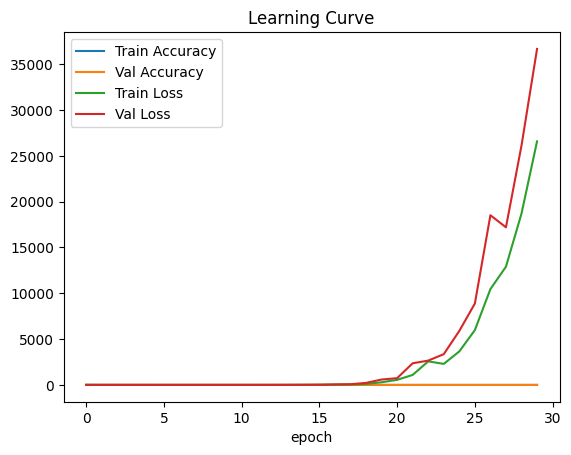

In [20]:
plot_learning_curve(history)

# Redes Preentrenadas

In [1]:
from keras import utils
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path
import shutil
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [15]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
DATASET_PATH=Path('dataset')
# Get the list of class names (subfolder names)
class_names = sorted([subfolder.name for subfolder in DATASET_PATH.iterdir() if subfolder.is_dir()])

# Generate file paths and corresponding labels
file_paths = []
labels = []
for class_idx, class_name in enumerate(class_names):
    class_path = DATASET_PATH / class_name
    class_files = list(class_path.glob('*'))
    file_paths.extend(class_files)
    labels.extend([class_idx] * len(class_files))

# Perform stratified train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    file_paths, labels, test_size=0.2, random_state=42, stratify=labels
)
balanced_dataset = Path('balanced_dataset')
balanced_dataset_training =  balanced_dataset / 'train'
balanced_dataset_training.mkdir(parents=True, exist_ok=True)
balanced_dataset_val =  balanced_dataset / 'val'
balanced_dataset_val.mkdir(parents=True, exist_ok=True)

for x in tqdm(X_train):
    sub_dir_path = balanced_dataset_training / x.parent.name / x.name
    if not sub_dir_path.exists():
        sub_dir_path.parent.mkdir(parents=True, exist_ok=True)
        shutil.copyfile(str(x), str(sub_dir_path))

for x in tqdm(X_val):
    sub_dir_path = balanced_dataset_val / x.parent.name / x.name
    if not sub_dir_path.exists():
        sub_dir_path.parent.mkdir(parents=True, exist_ok=True)
        shutil.copyfile(str(x), str(sub_dir_path))
def create_datasets(train_dir, val_dir, batch_size, img_size, shuffle=True):
    train_dataset = utils.image_dataset_from_directory(
                                                    train_dir,
                                                   shuffle=shuffle,
                                                    label_mode='categorical',
                                                   batch_size=batch_size,
                                                   image_size=img_size,
                                                  validation_split=None,
                                                  seed=1337)
    validation_dataset = utils.image_dataset_from_directory(
                                                    val_dir,
                                                   shuffle=shuffle,
                                                    label_mode='categorical',
                                                   batch_size=batch_size,
                                                   image_size=img_size,
                                                  validation_split=None,
                                                  seed=1337)

    return train_dataset, validation_dataset

train_dataset, validation_dataset = create_datasets(str(balanced_dataset_training), str(balanced_dataset_val), BATCH_SIZE, IMG_SIZE)

100%|█████████████████████████████████████| 552/552 [00:00<00:00, 128340.12it/s]

Found 2206 files belonging to 47 classes.
Found 552 files belonging to 47 classes.


TypeError: only integer scalar arrays can be converted to a scalar index

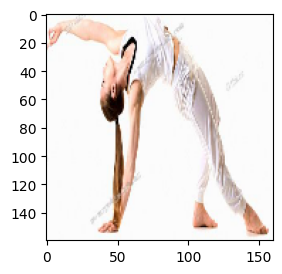

In [16]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
def prefetch_datasets(train_dataset, validation_dataset):
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)

    print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
    print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))
    AUTOTUNE = tf.data.AUTOTUNE

    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

    return train_dataset, validation_dataset, test_dataset

train_dataset, validation_dataset, test_dataset = prefetch_datasets(train_dataset, validation_dataset)

Number of validation batches: 15
Number of test batches: 3


Vamos a definir una aumentación básica

In [18]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

Y comprobamos que dicha aumentación se realiza correctamente

2023-11-18 18:49:55.647490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:49:55.671577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:49:55.693165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:49:55.714206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:49:55.734993: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:49:55.757782: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation

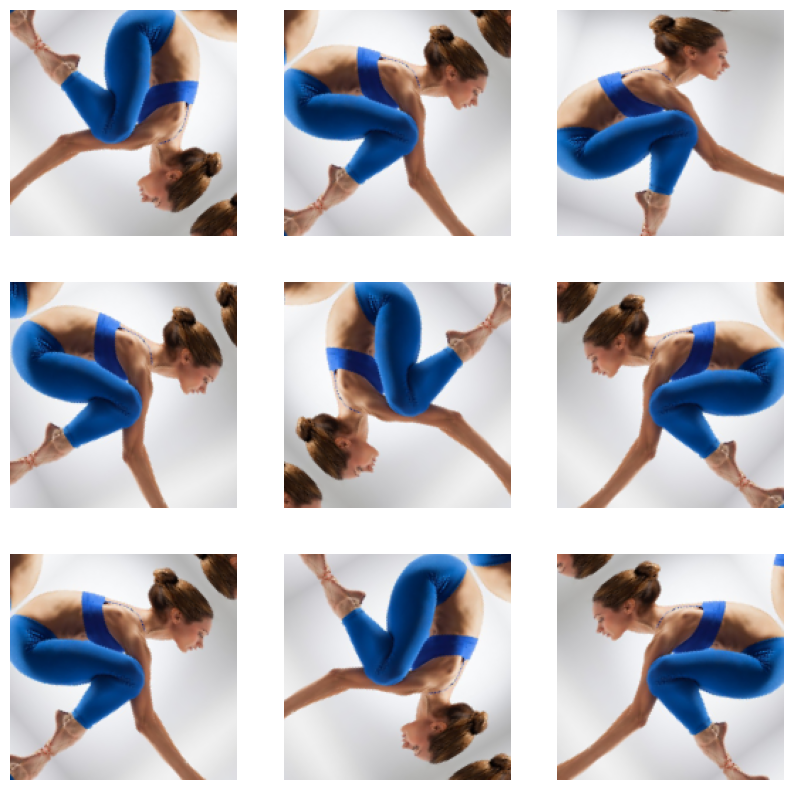

In [19]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Tras esto, realizaremos una selección de las dos arquitecturas a comparar. Para ello, vamos a buscar las que tengan un mejor rendimiento a priori con nuestro conjunto de datos, de entre todos los disponibles en Keras.

In [7]:
model_base = {
    "Xception": {"IMG_SHAPE":(150,150, 3), "PREPROCESS_INPUT":tf.keras.applications.xception.preprocess_input},
    "VGG16": {"IMG_SHAPE":(128, 128,3), "PREPROCESS_INPUT":tf.keras.applications.vgg16.preprocess_input},
    "VGG19": {"IMG_SHAPE":(128, 128,3), "PREPROCESS_INPUT":tf.keras.applications.vgg19.preprocess_input},
    "InceptionResNetV2": {"IMG_SHAPE":(128, 128,3), "PREPROCESS_INPUT":tf.keras.applications.inception_resnet_v2.preprocess_input},
    "MobileNet": {"IMG_SHAPE":(128, 128,3), "PREPROCESS_INPUT":tf.keras.applications.mobilenet.preprocess_input},
    "MobileNetV2": {"IMG_SHAPE":(128, 128,3), "PREPROCESS_INPUT":tf.keras.applications.mobilenet_v2.preprocess_input},
    "NASNetMobile": {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.nasnet.preprocess_input},
}
for i in [121, 169, 201]:
    model_base[f"DeseNet{i}"]: {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.densenet.preprocess_input}
for i in [50,101, 152]:
    model_base[f"ResNet{i}"]: {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.resnet.preprocess_input}
    model_base[f"ResNet{i}V2"]: {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.resnet.preprocess_input}
for i in range(8):
    model_base[f"EfficientNetB{i}"] = {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.efficientnet.preprocess_input}
for i in range(4):
    model_base[f"EfficientNetV2B{i}"] = {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.efficientnet_v2.preprocess_input}
for i in ['S', 'L', 'M']:
    model_base[f"EfficientNetV2{i}"] = {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.efficientnet_v2.preprocess_input}
for i in ['Tiny', 'Small', 'Base', 'Large', 'XLarge']:
    model_base[f"ConvNeXt{i}"] = {"IMG_SHAPE":(224,224,3), "PREPROCESS_INPUT":tf.keras.applications.efficientnet_v2.preprocess_input}

Para cada una de esas arquitecturas, crearemos un modelo y lo entrenaremos durante un número bajo de épocas, para poder hacernos una idea rápida de lo prestante de cada arquitectura en nuestro caso.

In [8]:
def get_feature_batch(train_dataset, base_model):
    image_batch, label_batch = next(iter(train_dataset))
    feature_batch = base_model(image_batch)
    print(feature_batch.shape)

    return feature_batch

In [9]:
def create_model(base_model, img_shape, train_dataset, preprocess_input):
    base_model.trainable = False
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    feature_batch = get_feature_batch(train_dataset, base_model)
    feature_batch_average = global_average_layer(feature_batch)
    print(feature_batch_average.shape)
    prediction_layer = tf.keras.layers.Dense(number_of_classes, activation="softmax")
    prediction_batch = prediction_layer(feature_batch_average)
    print(prediction_batch.shape)
    inputs = tf.keras.Input(shape=img_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(inputs)
    x = base_model(x, training=False)
    x = global_average_layer(x)
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    
    return model

Recorremos nuestro repositorio de modelos entrenando cada uno de ellos durante 10 épocas:

In [43]:
for model_name, config in model_base.items():
    try:
        initial_epochs = 10
        print(f"Training {model_name} for {initial_epochs} epochs.")
        train_dataset, validation_dataset, _ = prefetch_datasets(*create_datasets(train_dir=str(balanced_dataset_training), 
                                                                             val_dir=str(balanced_dataset_val),
                                                           img_size=(config["IMG_SHAPE"][0],config["IMG_SHAPE"][1]),
                                                           batch_size=BATCH_SIZE,
                                                           shuffle=True))
        base_model_class = getattr(tf.keras.applications, model_name)
        base_model = base_model_class(input_shape=config["IMG_SHAPE"],include_top=False, weights='imagenet')
        model = create_model(base_model, config["IMG_SHAPE"], train_dataset, config["PREPROCESS_INPUT"])
        base_learning_rate = 0.0001
        model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #model.summary()
        history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    verbose=1)
        model_base[model_name]["history"] = history
    except Exception as e:
        print(f"Error while training model {model_name}")
        print(e)
        break

Training Xception for 10 epochs.
Found 2206 files belonging to 47 classes.
Found 552 files belonging to 47 classes.
Number of validation batches: 15
Number of test batches: 3
(32, 10, 10, 2048)
(32, 2048)
(32, 47)
Epoch 1/10


2023-11-18 18:13:21.696963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 4/69 [>.............................] - ETA: 16s - loss: 3.8746 - accuracy: 0.0391   

2023-11-18 18:13:27.935228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:13:27.943362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities


14/69 [=====>........................] - ETA: 13s - loss: 3.8509 - accuracy: 0.0312

2023-11-18 18:13:30.303251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/69 [================>.............] - ETA: 6s - loss: 3.8118 - accuracy: 0.0344

KeyboardInterrupt: 

Tras todos estos entrenamientos, visualizaremos los resultados, primero en forma de tabla:

In [95]:
import pandas as pd
# Lista para almacenar los datos de entrenamiento
data = []

# Itera a través del diccionario y extrae los datos de entrenamiento
for model_name, model_info in model_base.items():
    if "history" in model_info:
        history = model_info["history"]
        train_loss = history.history['loss'][-1]
        train_acc = history.history['accuracy'][-1]
        val_loss = history.history['val_loss'][-1]
        val_acc = history.history['val_accuracy'][-1]
    
        # Añade los datos al DataFrame
        data.append([model_name, train_loss, train_acc, val_loss, val_acc])

# Crea un DataFrame con los datos
df = pd.DataFrame(data, columns=['Modelo', 'Train Loss', 'Train Acc', 'Val Loss', 'Val Acc'])
# Ordena el DataFrame por accuracy en orden ascendente
df_sorted = df.sort_values(by='Val Acc', ascending=True).reset_index()
# Muestra el DataFrame
print(df_sorted)

    index             Modelo  Train Loss  Train Acc  Val Loss   Val Acc
0       2              VGG19    5.198274   0.135086  4.341908  0.138158
1       1              VGG16    5.545590   0.135539  4.690221  0.144737
2      19    EfficientNetV2L    2.978536   0.342702  3.061945  0.315789
3      20    EfficientNetV2M    2.912225   0.354488  2.994777  0.342105
4      18    EfficientNetV2S    2.753974   0.406618  2.846293  0.361842
5       3  InceptionResNetV2    2.365372   0.398005  2.437135  0.381579
6       0           Xception    2.876036   0.454669  2.982930  0.410088
7       8     EfficientNetB2    2.567918   0.505893  2.663387  0.427632
8       5        MobileNetV2    2.124575   0.463735  2.292695  0.429825
9       4          MobileNet    2.194110   0.448776  2.271103  0.438596
10     17   EfficientNetV2B3    2.496536   0.504533  2.618338  0.447368
11      9     EfficientNetB3    2.476012   0.494107  2.615350  0.449561
12     15   EfficientNetV2B1    2.624037   0.449229  2.696540  0

Y después de manera gráfica. Como se puede observar la familia de EfficientNet es la que mejores resultados ofrece. Con objeto de presentar la comparativa entre dos tipos de arquitecturas distintas, solo elegiremos de entre dicha familia el modelo que mejor se ha comportado, y nos quedaremos con la arquitectura externa a la familia de EfficientNet que mejor accuracy de validación presente. 

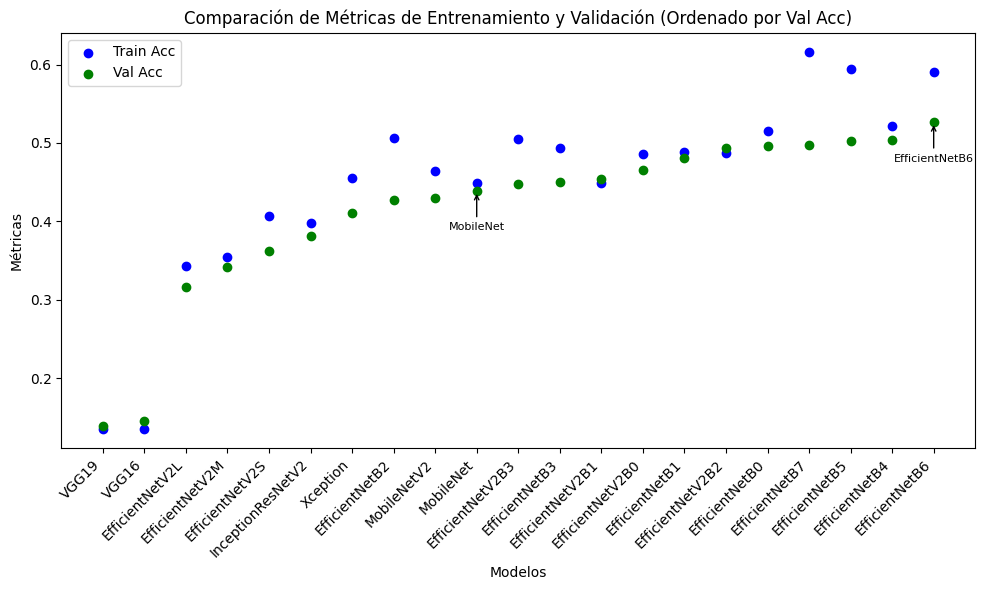

In [101]:
import matplotlib.pyplot as plt

# Plotear los datos ordenados por accuracy
plt.figure(figsize=(10, 6))

# Plotea la precisión de entrenamiento y validación
plt.scatter(df_sorted['Modelo'], df_sorted['Train Acc'], color='b', label='Train Acc')
plt.scatter(df_sorted['Modelo'], df_sorted['Val Acc'], color='g', label='Val Acc')


# Destaca los puntos correspondientes a MobileNet y EfficientNetB6 con flechas
mobile_net_idx = df_sorted[df_sorted['Modelo'] == 'MobileNet'].index.values[0]
efficient_net_b6_idx = df_sorted[df_sorted['Modelo'] == 'EfficientNetB6'].index.values[0]

plt.annotate('MobileNet', xy=(mobile_net_idx, df_sorted.loc[mobile_net_idx, 'Val Acc']),
             xytext=(mobile_net_idx, df_sorted.loc[mobile_net_idx, 'Val Acc'] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8, ha='center')

plt.annotate('EfficientNetB6', xy=(efficient_net_b6_idx, df_sorted.loc[efficient_net_b6_idx, 'Val Acc']),
             xytext=(efficient_net_b6_idx, df_sorted.loc[efficient_net_b6_idx, 'Val Acc'] - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8, ha='center')

plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.title('Comparación de Métricas de Entrenamiento y Validación (Ordenado por Val Acc)')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()



Siguiendo la gráfica anterior, nos quedamos entonces con MobileNetV2 y con EfficientNetB6

In [23]:
#initial_epochs = 30

#loss0, accuracy0 = model.evaluate(validation_dataset)

15/15 [==============================] - 9s 328ms/step - loss: 4.4097 - accuracy: 0.0241


In [24]:
#print("initial loss: {:.2f}".format(loss0))
#print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 4.41
initial accuracy: 0.02


## Transfer Learning

Comenzaremos primero realizando un proceso de _transfer learning_ en el que se usará por completo el modelo base de las arquitecturas arriba mencionadas. Para ello se carga la arquitectura sin el top model, se congela ese _base model_ y se añaden capas para que realicen la tarea para la que estamos haciendo transfer learning. Hay que tener en cuenta que debemos realizar el mismo procesado a nuestra imágenes de entrenamiento que se usó en el entrenamiento original de la red preentrenada en la que nos basemos. 

Primero haremos el proceso con MobileNetV2.

In [ ]:
from keras.applications import MobileNetV2
from keras.layers import GlobalAveragePooling2D

number_of_classes = 47

config = model_base["MobileNetV2"]
train_dataset, validation_dataset, _ = prefetch_datasets(*create_datasets(train_dir=str(balanced_dataset_training), 
                                                                             val_dir=str(balanced_dataset_val),
                                                           img_size=(config["IMG_SHAPE"][0],config["IMG_SHAPE"][1]),
                                                           batch_size=BATCH_SIZE,
                                                           shuffle=True))

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=config["IMG_SHAPE"])

base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


inputs = tf.keras.layers.Input(shape=config["IMG_SHAPE"])
print(inputs.shape)
x = data_augmentation(inputs)
x = config['PREPROCESS_INPUT'](x)
x = base_model(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
#top model 
dense_layers = [512, 256]
for d in dense_layers:
    x = tf.keras.layers.Dense(d, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(number_of_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.summary()

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_dataset, 
    epochs=50, 
    validation_data=validation_dataset)

Found 2206 files belonging to 47 classes.
Found 552 files belonging to 47 classes.
Number of validation batches: 15
Number of test batches: 3
(None, 160, 160, 3)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_4 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_4 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Func  

2023-11-18 18:50:08.250190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-18 18:50:08.457603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/69 [>.............................] - ETA: 5s - loss: 7.4224 - accuracy: 0.0312

2023-11-18 18:50:15.266540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:15.350100: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:15.421988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/69 [=>............................] - ETA: 4s - loss: 7.7544 - accuracy: 0.0208

2023-11-18 18:50:15.498417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:15.498797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:15.507666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-11-18 18:50:15.575886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:15.654703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/69 [==>...........................] - ETA: 4s - loss: 7.8158 - accuracy: 0.0243

2023-11-18 18:50:15.726955: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:15.799351: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:15.872640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/69 [====>.........................] - ETA: 4s - loss: 7.8869 - accuracy: 0.0208

2023-11-18 18:50:15.944039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.014594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.084105: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/69 [=====>........................] - ETA: 4s - loss: 7.8367 - accuracy: 0.0188

2023-11-18 18:50:16.150879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.221442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.238701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:16.305756: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/69 [======>.......................] - ETA: 3s - loss: 7.7931 - accuracy: 0.0174

2023-11-18 18:50:16.377213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.450740: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.527004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/69 [========>.....................] - ETA: 3s - loss: 7.7853 - accuracy: 0.0164

2023-11-18 18:50:16.599053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.671359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.742543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/69 [=========>....................] - ETA: 3s - loss: 7.7238 - accuracy: 0.0169

2023-11-18 18:50:16.816491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.887312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:16.955639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/69 [==========>...................] - ETA: 3s - loss: 7.7328 - accuracy: 0.0150

2023-11-18 18:50:17.035132: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.106252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.178965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/69 [============>.................] - ETA: 2s - loss: 7.7520 - accuracy: 0.0146

2023-11-18 18:50:17.246167: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.317502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.382924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/69 [=============>................] - ETA: 2s - loss: 7.7569 - accuracy: 0.0180

2023-11-18 18:50:17.452292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.521858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.593651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/69 [==============>...............] - ETA: 2s - loss: 7.7847 - accuracy: 0.0191

2023-11-18 18:50:17.664609: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.731699: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.803970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/69 [================>.............] - ETA: 2s - loss: 7.7645 - accuracy: 0.0203

2023-11-18 18:50:17.873862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:17.940700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.008357: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.074079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/69 [=================>............] - ETA: 1s - loss: 7.7758 - accuracy: 0.0189

2023-11-18 18:50:18.151693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.242271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.310354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/69 [===================>..........] - ETA: 1s - loss: 7.7611 - accuracy: 0.0190

2023-11-18 18:50:18.381685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:18.384382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.452863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.524239: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/69 [====================>.........] - ETA: 1s - loss: 7.7636 - accuracy: 0.0185

2023-11-18 18:50:18.594632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.660429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.733165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/69 [======================>.......] - ETA: 1s - loss: 7.7347 - accuracy: 0.0171

2023-11-18 18:50:18.800963: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.868583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:18.936532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/69 [=======================>......] - ETA: 0s - loss: 7.7054 - accuracy: 0.0173

2023-11-18 18:50:19.005152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.073613: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.141586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.205266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/69 [=========================>....] - ETA: 0s - loss: 7.7031 - accuracy: 0.0167

2023-11-18 18:50:19.269957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.334353: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.400721: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.464260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


64/69 [==========================>...] - ETA: 0s - loss: 7.6553 - accuracy: 0.0166

2023-11-18 18:50:19.527743: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.591132: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.655159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.719431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


68/69 [============================>.] - ETA: 0s - loss: 7.6494 - accuracy: 0.0161

2023-11-18 18:50:19.793038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.858161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.925913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:19.991188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - 29s 305ms/step - loss: 7.6528 - accuracy: 0.0163 - val_loss: 4.3019 - val_accuracy: 0.0373
Epoch 2/50


2023-11-18 18:50:35.994302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/69 [>.............................] - ETA: 4s - loss: 7.2904 - accuracy: 0.0104    

2023-11-18 18:50:36.596032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:36.673714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:36.743302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/69 [=>............................] - ETA: 4s - loss: 7.1854 - accuracy: 0.0104

2023-11-18 18:50:36.810195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:36.814878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:36.818123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-11-18 18:50:36.886977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:36.956534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/69 [==>...........................] - ETA: 4s - loss: 7.2190 - accuracy: 0.0208

2023-11-18 18:50:37.029939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.107853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.175571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/69 [====>.........................] - ETA: 4s - loss: 7.2969 - accuracy: 0.0339

2023-11-18 18:50:37.252816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.322845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.410830: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/69 [=====>........................] - ETA: 3s - loss: 7.4014 - accuracy: 0.0312

2023-11-18 18:50:37.479882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.551620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.559028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:37.619618: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/69 [======>.......................] - ETA: 3s - loss: 7.3449 - accuracy: 0.0347

2023-11-18 18:50:37.688017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.758163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.837033: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/69 [========>.....................] - ETA: 3s - loss: 7.3889 - accuracy: 0.0342

2023-11-18 18:50:37.907460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:37.976506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.046178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/69 [=========>....................] - ETA: 3s - loss: 7.3565 - accuracy: 0.0339

2023-11-18 18:50:38.114558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.182690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.252199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/69 [==========>...................] - ETA: 3s - loss: 7.4135 - accuracy: 0.0324

2023-11-18 18:50:38.336655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.413659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.483335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/69 [============>.................] - ETA: 2s - loss: 7.3980 - accuracy: 0.0323

2023-11-18 18:50:38.552616: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.628618: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.698861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/69 [=============>................] - ETA: 2s - loss: 7.3675 - accuracy: 0.0341

2023-11-18 18:50:38.769354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.839042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:38.920442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/69 [==============>...............] - ETA: 2s - loss: 7.3476 - accuracy: 0.0321

2023-11-18 18:50:38.989845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.060890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.131020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/69 [===============>..............] - ETA: 2s - loss: 7.3361 - accuracy: 0.0345

2023-11-18 18:50:39.201723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.268533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.344662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/69 [=================>............] - ETA: 1s - loss: 7.3199 - accuracy: 0.0342

2023-11-18 18:50:39.411681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.476039: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.560119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/69 [==================>...........] - ETA: 1s - loss: 7.3105 - accuracy: 0.0333

2023-11-18 18:50:39.632199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.702911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:39.705712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.777667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/69 [===================>..........] - ETA: 1s - loss: 7.2817 - accuracy: 0.0345

2023-11-18 18:50:39.844905: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.920735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:39.989507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/69 [=====================>........] - ETA: 1s - loss: 7.3168 - accuracy: 0.0331

2023-11-18 18:50:40.073536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.141976: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.220312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/69 [======================>.......] - ETA: 1s - loss: 7.3530 - accuracy: 0.0312

2023-11-18 18:50:40.294152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.362875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.432567: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/69 [========================>.....] - ETA: 0s - loss: 7.3260 - accuracy: 0.0312

2023-11-18 18:50:40.497539: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.560964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.624540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.688764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/69 [=========================>....] - ETA: 0s - loss: 7.3479 - accuracy: 0.0318

2023-11-18 18:50:40.760192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.825078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.891379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:40.956067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


66/69 [===========================>..] - ETA: 0s - loss: 7.3491 - accuracy: 0.0303

2023-11-18 18:50:41.020284: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:41.091951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:41.156054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


68/69 [============================>.] - ETA: 0s - loss: 7.3732 - accuracy: 0.0299

2023-11-18 18:50:41.221774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:41.287197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:41.351208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - 7s 88ms/step - loss: 7.3758 - accuracy: 0.0299 - val_loss: 4.1471 - val_accuracy: 0.0526
Epoch 3/50


2023-11-18 18:50:42.588586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/69 [>.............................] - ETA: 4s - loss: 6.5160 - accuracy: 0.0521

2023-11-18 18:50:43.171926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.243377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.311289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/69 [=>............................] - ETA: 4s - loss: 6.8969 - accuracy: 0.0365

2023-11-18 18:50:43.374558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:43.379007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.382509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-11-18 18:50:43.448168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.517089: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/69 [==>...........................] - ETA: 4s - loss: 6.9982 - accuracy: 0.0417

2023-11-18 18:50:43.584514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.654648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.721362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/69 [====>.........................] - ETA: 3s - loss: 7.1507 - accuracy: 0.0391

2023-11-18 18:50:43.792198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.869456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:43.938826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/69 [=====>........................] - ETA: 3s - loss: 7.2471 - accuracy: 0.0417

2023-11-18 18:50:44.008115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.079174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.089885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:44.147653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/69 [======>.......................] - ETA: 3s - loss: 7.3930 - accuracy: 0.0347

2023-11-18 18:50:44.217838: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.288212: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.362438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/69 [========>.....................] - ETA: 3s - loss: 7.4879 - accuracy: 0.0312

2023-11-18 18:50:44.441487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.510345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.577907: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/69 [=========>....................] - ETA: 3s - loss: 7.4719 - accuracy: 0.0312

2023-11-18 18:50:44.645825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.717824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.808843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/69 [==========>...................] - ETA: 2s - loss: 7.4459 - accuracy: 0.0312

2023-11-18 18:50:44.880457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:44.949811: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.018789: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/69 [============>.................] - ETA: 2s - loss: 7.4519 - accuracy: 0.0302

2023-11-18 18:50:45.087942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.156077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.226273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/69 [=============>................] - ETA: 2s - loss: 7.4200 - accuracy: 0.0294

2023-11-18 18:50:45.295362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.363878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.435179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/69 [==============>...............] - ETA: 2s - loss: 7.4128 - accuracy: 0.0286

2023-11-18 18:50:45.505788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.578011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.646515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/69 [================>.............] - ETA: 2s - loss: 7.4557 - accuracy: 0.0297

2023-11-18 18:50:45.717137: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.786318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.854062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/69 [=================>............] - ETA: 1s - loss: 7.4723 - accuracy: 0.0290

2023-11-18 18:50:45.920394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:45.987080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.073588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/69 [==================>...........] - ETA: 1s - loss: 7.4593 - accuracy: 0.0312

2023-11-18 18:50:46.146595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.218427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:46.221584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.294686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/69 [===================>..........] - ETA: 1s - loss: 7.4361 - accuracy: 0.0312

2023-11-18 18:50:46.383583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.456014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.525911: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/69 [=====================>........] - ETA: 1s - loss: 7.4223 - accuracy: 0.0325

2023-11-18 18:50:46.598050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.669513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.744049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/69 [======================>.......] - ETA: 1s - loss: 7.4216 - accuracy: 0.0324

2023-11-18 18:50:46.812227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.882773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:46.953468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/69 [========================>.....] - ETA: 0s - loss: 7.3930 - accuracy: 0.0312

2023-11-18 18:50:47.018730: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.083725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.147523: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.215880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/69 [=========================>....] - ETA: 0s - loss: 7.3486 - accuracy: 0.0318

2023-11-18 18:50:47.281999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.345705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.410408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.474242: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


66/69 [===========================>..] - ETA: 0s - loss: 7.3573 - accuracy: 0.0327

2023-11-18 18:50:47.539019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.604564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.669090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.733812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - ETA: 0s - loss: 7.3488 - accuracy: 0.0322

2023-11-18 18:50:47.797968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:47.864038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - 6s 87ms/step - loss: 7.3488 - accuracy: 0.0322 - val_loss: 3.9315 - val_accuracy: 0.0592
Epoch 4/50


2023-11-18 18:50:49.071223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/69 [>.............................] - ETA: 4s - loss: 7.2554 - accuracy: 0.0417

2023-11-18 18:50:49.649515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:49.719651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:49.789220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/69 [=>............................] - ETA: 4s - loss: 7.4945 - accuracy: 0.0312

2023-11-18 18:50:49.855788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:49.859438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:49.863337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-11-18 18:50:49.929516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:49.999313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/69 [==>...........................] - ETA: 4s - loss: 7.4294 - accuracy: 0.0278

2023-11-18 18:50:50.078214: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.148282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.217010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/69 [====>.........................] - ETA: 4s - loss: 7.4105 - accuracy: 0.0312

2023-11-18 18:50:50.289332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.358283: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.436409: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/69 [=====>........................] - ETA: 3s - loss: 7.4306 - accuracy: 0.0396

2023-11-18 18:50:50.505904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.576635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.583945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:50.645658: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/69 [======>.......................] - ETA: 3s - loss: 7.3121 - accuracy: 0.0417

2023-11-18 18:50:50.714620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.784840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.854712: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/69 [========>.....................] - ETA: 3s - loss: 7.2023 - accuracy: 0.0506

2023-11-18 18:50:50.922242: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:50.990205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.065719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/69 [=========>....................] - ETA: 3s - loss: 7.2526 - accuracy: 0.0482

2023-11-18 18:50:51.141574: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.220792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.292634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/69 [==========>...................] - ETA: 2s - loss: 7.3264 - accuracy: 0.0451

2023-11-18 18:50:51.369538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.438576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.506832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/69 [============>.................] - ETA: 2s - loss: 7.2547 - accuracy: 0.0437

2023-11-18 18:50:51.577960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.647273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.718058: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/69 [=============>................] - ETA: 2s - loss: 7.2350 - accuracy: 0.0436

2023-11-18 18:50:51.788246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.865630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:51.939895: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/69 [==============>...............] - ETA: 2s - loss: 7.2277 - accuracy: 0.0443

2023-11-18 18:50:52.009108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.089056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.158130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/69 [================>.............] - ETA: 2s - loss: 7.1953 - accuracy: 0.0469

2023-11-18 18:50:52.236762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.302625: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.371463: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/69 [=================>............] - ETA: 1s - loss: 7.2013 - accuracy: 0.0476

2023-11-18 18:50:52.439324: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.504954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.585119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/69 [==================>...........] - ETA: 1s - loss: 7.2285 - accuracy: 0.0472

2023-11-18 18:50:52.658899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.751180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:52.755753: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.829503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/69 [===================>..........] - ETA: 1s - loss: 7.2460 - accuracy: 0.0469

2023-11-18 18:50:52.897650: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:52.966128: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.035101: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/69 [=====================>........] - ETA: 1s - loss: 7.2438 - accuracy: 0.0453

2023-11-18 18:50:53.111124: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.181365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.253293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/69 [======================>.......] - ETA: 1s - loss: 7.2536 - accuracy: 0.0469

2023-11-18 18:50:53.322583: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.390974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.463666: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/69 [========================>.....] - ETA: 0s - loss: 7.2494 - accuracy: 0.0463

2023-11-18 18:50:53.530974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.595002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.659192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.724562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/69 [=========================>....] - ETA: 0s - loss: 7.2645 - accuracy: 0.0459

2023-11-18 18:50:53.788924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.854750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.919348: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:53.983773: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


66/69 [===========================>..] - ETA: 0s - loss: 7.2470 - accuracy: 0.0459

2023-11-18 18:50:54.048007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:54.112028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:54.177922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:54.241821: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - ETA: 0s - loss: 7.2367 - accuracy: 0.0476

2023-11-18 18:50:54.310553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:54.383111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - 7s 87ms/step - loss: 7.2367 - accuracy: 0.0476 - val_loss: 3.9544 - val_accuracy: 0.0614
Epoch 5/50


2023-11-18 18:50:55.599936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/69 [>.............................] - ETA: 4s - loss: 7.4908 - accuracy: 0.0417

2023-11-18 18:50:56.179333: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.251951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.321534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/69 [=>............................] - ETA: 4s - loss: 7.0498 - accuracy: 0.0417

2023-11-18 18:50:56.389699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:56.393576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.397148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-11-18 18:50:56.463532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.531942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/69 [==>...........................] - ETA: 4s - loss: 6.9495 - accuracy: 0.0451

2023-11-18 18:50:56.604911: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.676111: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.744436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/69 [====>.........................] - ETA: 4s - loss: 6.8051 - accuracy: 0.0469

2023-11-18 18:50:56.816040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.884045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:56.953142: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/69 [=====>........................] - ETA: 3s - loss: 6.9333 - accuracy: 0.0417

2023-11-18 18:50:57.021946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.091130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.099349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:57.159709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/69 [======>.......................] - ETA: 3s - loss: 6.9930 - accuracy: 0.0365

2023-11-18 18:50:57.230600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.302401: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.370338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/69 [========>.....................] - ETA: 3s - loss: 7.0210 - accuracy: 0.0412

2023-11-18 18:50:57.455526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.523258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.591131: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/69 [=========>....................] - ETA: 3s - loss: 6.9942 - accuracy: 0.0404

2023-11-18 18:50:57.660509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.731517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.800430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/69 [===========>..................] - ETA: 2s - loss: 7.0128 - accuracy: 0.0413

2023-11-18 18:50:57.872227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:57.940620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.009387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/69 [============>.................] - ETA: 2s - loss: 6.9874 - accuracy: 0.0437

2023-11-18 18:50:58.078057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.146413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.215088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/69 [=============>................] - ETA: 2s - loss: 6.9785 - accuracy: 0.0455

2023-11-18 18:50:58.286669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.355095: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.424962: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/69 [==============>...............] - ETA: 2s - loss: 6.9486 - accuracy: 0.0434

2023-11-18 18:50:58.497062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.569910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.645683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/69 [================>.............] - ETA: 2s - loss: 6.9217 - accuracy: 0.0430

2023-11-18 18:50:58.713601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.782005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.850374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/69 [=================>............] - ETA: 1s - loss: 6.9689 - accuracy: 0.0432

2023-11-18 18:50:58.917021: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:58.983373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.087726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/69 [==================>...........] - ETA: 1s - loss: 6.9113 - accuracy: 0.0458

2023-11-18 18:50:59.166260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.246882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:50:59.250059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.320198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/69 [===================>..........] - ETA: 1s - loss: 6.9460 - accuracy: 0.0436

2023-11-18 18:50:59.389210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.456808: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.523463: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/69 [=====================>........] - ETA: 1s - loss: 6.9307 - accuracy: 0.0447

2023-11-18 18:50:59.595650: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.665592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.736389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/69 [======================>.......] - ETA: 1s - loss: 6.9198 - accuracy: 0.0446

2023-11-18 18:50:59.803464: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.880205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:50:59.951070: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/69 [========================>.....] - ETA: 0s - loss: 6.9100 - accuracy: 0.0442

2023-11-18 18:51:00.017390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.089140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.152990: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.217832: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/69 [=========================>....] - ETA: 0s - loss: 6.8916 - accuracy: 0.0459

2023-11-18 18:51:00.282816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.346270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.410260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.475096: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


65/69 [===========================>..] - ETA: 0s - loss: 6.8918 - accuracy: 0.0466

2023-11-18 18:51:00.539868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.612005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.683144: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - ETA: 0s - loss: 6.9172 - accuracy: 0.0462

2023-11-18 18:51:00.746538: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.810692: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:00.875032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - 6s 87ms/step - loss: 6.9172 - accuracy: 0.0462 - val_loss: 3.8970 - val_accuracy: 0.0724
Epoch 6/50


2023-11-18 18:51:02.071998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/69 [>.............................] - ETA: 4s - loss: 6.9931 - accuracy: 0.0417

2023-11-18 18:51:02.661358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:02.737052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:02.813297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/69 [=>............................] - ETA: 4s - loss: 7.1654 - accuracy: 0.0573

2023-11-18 18:51:02.881013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:51:02.884950: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:02.888461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-11-18 18:51:02.953447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.027014: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/69 [==>...........................] - ETA: 4s - loss: 7.2385 - accuracy: 0.0556

2023-11-18 18:51:03.098387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.166383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.235475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/69 [====>.........................] - ETA: 4s - loss: 7.1143 - accuracy: 0.0573

2023-11-18 18:51:03.308489: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.378372: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.448955: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/69 [=====>........................] - ETA: 3s - loss: 7.2032 - accuracy: 0.0542

2023-11-18 18:51:03.520044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.591780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.600066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:51:03.662758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/69 [======>.......................] - ETA: 3s - loss: 7.1590 - accuracy: 0.0503

2023-11-18 18:51:03.735397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.813846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:03.882687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/69 [========>.....................] - ETA: 3s - loss: 7.0618 - accuracy: 0.0497

2023-11-18 18:51:03.952997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.019968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.086418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/69 [=========>....................] - ETA: 3s - loss: 7.0005 - accuracy: 0.0508

2023-11-18 18:51:04.157771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.230166: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.301510: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/69 [==========>...................] - ETA: 3s - loss: 7.0069 - accuracy: 0.0532

2023-11-18 18:51:04.371002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.449261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.530018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/69 [============>.................] - ETA: 2s - loss: 6.9697 - accuracy: 0.0521

2023-11-18 18:51:04.598746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.668019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.738134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/69 [=============>................] - ETA: 2s - loss: 6.9158 - accuracy: 0.0502

2023-11-18 18:51:04.809416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.880446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:04.954578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/69 [==============>...............] - ETA: 2s - loss: 6.9281 - accuracy: 0.0477

2023-11-18 18:51:05.024633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.095573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.165587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/69 [===============>..............] - ETA: 2s - loss: 6.9383 - accuracy: 0.0465

2023-11-18 18:51:05.235228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.302377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.371420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/69 [=================>............] - ETA: 1s - loss: 7.0070 - accuracy: 0.0454

2023-11-18 18:51:05.449595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.520068: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.595557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/69 [==================>...........] - ETA: 1s - loss: 6.9917 - accuracy: 0.0472

2023-11-18 18:51:05.669083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.738939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:51:05.743895: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.817555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/69 [===================>..........] - ETA: 1s - loss: 7.0242 - accuracy: 0.0462

2023-11-18 18:51:05.886355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:05.954514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.023919: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/69 [=====================>........] - ETA: 1s - loss: 6.9575 - accuracy: 0.0490

2023-11-18 18:51:06.094077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.168046: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.246135: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/69 [======================>.......] - ETA: 1s - loss: 6.9796 - accuracy: 0.0475

2023-11-18 18:51:06.313745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.384234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.456763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/69 [========================>.....] - ETA: 0s - loss: 7.0090 - accuracy: 0.0480

2023-11-18 18:51:06.522482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.589238: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.655361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/69 [=========================>....] - ETA: 0s - loss: 7.0016 - accuracy: 0.0479

2023-11-18 18:51:06.723628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.789634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:06.855764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/69 [==========================>...] - ETA: 0s - loss: 6.9975 - accuracy: 0.0491

2023-11-18 18:51:06.941260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:07.022630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:07.098533: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


67/69 [============================>.] - ETA: 0s - loss: 6.9844 - accuracy: 0.0485

2023-11-18 18:51:07.170705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:07.239871: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:07.307272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - ETA: 0s - loss: 6.9999 - accuracy: 0.0476

2023-11-18 18:51:07.373209: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:07.439928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - 7s 88ms/step - loss: 6.9999 - accuracy: 0.0476 - val_loss: 3.8633 - val_accuracy: 0.0965
Epoch 7/50


2023-11-18 18:51:08.631771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/69 [>.............................] - ETA: 4s - loss: 6.4761 - accuracy: 0.0833

2023-11-18 18:51:09.215422: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:09.290375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:09.358852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/69 [=>............................] - ETA: 4s - loss: 6.3256 - accuracy: 0.0677

2023-11-18 18:51:09.428114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:51:09.432235: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:09.435878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: inconsistent chromaticities
2023-11-18 18:51:09.507615: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:09.580173: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/69 [==>...........................] - ETA: 4s - loss: 6.7132 - accuracy: 0.0556

2023-11-18 18:51:09.649938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:09.720358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:09.788633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/69 [====>.........................] - ETA: 4s - loss: 6.8837 - accuracy: 0.0573

2023-11-18 18:51:09.860719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:09.932627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.006914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/69 [=====>........................] - ETA: 3s - loss: 6.8560 - accuracy: 0.0583

2023-11-18 18:51:10.093454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.175981: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.184062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:51:10.248706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/69 [======>.......................] - ETA: 3s - loss: 6.9849 - accuracy: 0.0573

2023-11-18 18:51:10.320370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.391942: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.468719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/69 [========>.....................] - ETA: 3s - loss: 7.0299 - accuracy: 0.0595

2023-11-18 18:51:10.541862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.623490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.696572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/69 [=========>....................] - ETA: 3s - loss: 6.9561 - accuracy: 0.0625

2023-11-18 18:51:10.766620: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.848163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:10.923051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/69 [==========>...................] - ETA: 3s - loss: 6.9658 - accuracy: 0.0590

2023-11-18 18:51:10.998488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.069444: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.140525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/69 [============>.................] - ETA: 2s - loss: 6.9607 - accuracy: 0.0562

2023-11-18 18:51:11.218772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.291129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.365210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/69 [=============>................] - ETA: 2s - loss: 6.9854 - accuracy: 0.0568

2023-11-18 18:51:11.442061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.514644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.589203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/69 [==============>...............] - ETA: 2s - loss: 6.9910 - accuracy: 0.0582

2023-11-18 18:51:11.657940: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.732391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.808377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/69 [===============>..............] - ETA: 2s - loss: 6.9711 - accuracy: 0.0585

2023-11-18 18:51:11.894881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:11.969052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.047593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/69 [=================>............] - ETA: 2s - loss: 6.9785 - accuracy: 0.0573

2023-11-18 18:51:12.115434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.186169: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.257043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/69 [==================>...........] - ETA: 1s - loss: 6.9585 - accuracy: 0.0569

2023-11-18 18:51:12.333687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.412006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.482097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-18 18:51:12.484606: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/69 [===================>..........] - ETA: 1s - loss: 6.9408 - accuracy: 0.0599

2023-11-18 18:51:12.557870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.626314: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.695524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/69 [=====================>........] - ETA: 1s - loss: 6.9118 - accuracy: 0.0588

2023-11-18 18:51:12.767616: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.837709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:12.908758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/69 [======================>.......] - ETA: 1s - loss: 6.8596 - accuracy: 0.0596

2023-11-18 18:51:12.979486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.047757: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.116711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/69 [========================>.....] - ETA: 0s - loss: 6.8457 - accuracy: 0.0609

2023-11-18 18:51:13.188016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.253760: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.318972: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.383440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/69 [=========================>....] - ETA: 0s - loss: 6.8282 - accuracy: 0.0625

2023-11-18 18:51:13.446812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.511213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.583341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


65/69 [===========================>..] - ETA: 0s - loss: 6.8466 - accuracy: 0.0620

2023-11-18 18:51:13.656946: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.724361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.790435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


68/69 [============================>.] - ETA: 0s - loss: 6.8349 - accuracy: 0.0607

2023-11-18 18:51:13.859958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.926848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-18 18:51:13.993425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - ETA: 0s - loss: 6.8332 - accuracy: 0.0617

2023-11-18 18:51:14.062653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/69 [==============================] - 7s 89ms/step - loss: 6.8332 - accuracy: 0.0617 - val_loss: 3.8114 - val_accuracy: 0.0965
Epoch 8/50


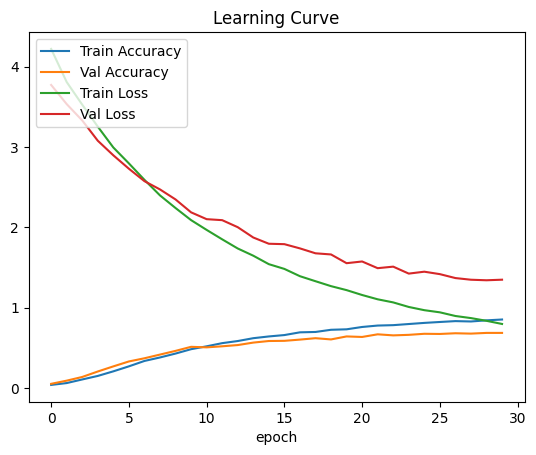

In [26]:
plot_learning_curve(history)

In [102]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Tamaño del lote
batch_size = 16

# Crear un tensor de entrada con forma (batch_size, altura, ancho, canales)
input_shape = (batch_size, 64, 64, 3)
input_tensor = tf.random.normal(input_shape)

# Crear el modelo con una capa Conv2D y una capa MaxPooling2D
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2))
])

# Obtener el mapa de activaciones
activations = model(input_tensor)

# Imprimir las dimensiones del mapa de activaciones
print("Dimensiones del mapa de activaciones:", activations.shape)


Dimensiones del mapa de activaciones: (16, 31, 31, 32)
